In [7]:
import docx2txt
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
text = docx2txt.process('../files/unsupervised_learning.docx')
text

'5. Aprendizaje no Supervisado\n\n\n\n\t5. Aprendizaje no supervisado\t2\n\n\t\t5.1\tReducción de la dimensionalidad.\t3\n\n\t5.1.2 El Análisis de Componentes Principales (PCA).\t3\n\n\t5.1.2 Algoritmo TSNE.\t12\n\n\t5.2 Clustering\t16\n\n\t5.2.1. Concepto de distancia\t16\n\n\t5.2.2. Concepto de similitud\t19\n\n\t5.3 Algoritmo AffinitAffinity Propagation\t20\n\n\t5.4 Algoritmo DBSCAN\t21\n\n\t5.4 Algoritmo de las K-medias\t27\n\n\t5.5 Algoritmo de las fuzzy c-means\t34\n\n\t5.6 Algoritmos Jerárquicos (Hierarchical Clustering Algorithm HCA)\t41\n\n\t5.6.1 BIRCH\t48\n\n\t4.6.2 HDBSCAN\t49\n\n\n\n\n\n\n5. Aprendizaje no supervisado\n\n\n\nEn el aprendizaje no supervisado no se dispone de las etiquetas yi del individuo (objeto) i que aparecía en el aprendizaje supervisado. Los datos que se disponen del individuo (objeto) i vienen almacenados en un vector xi. Esto es, tenemos información del mismo conjunto de atributos para todos los individuos. A partir de estos datos el aprendizaje no s

## Tokenization

In [9]:
from nltk.tokenize import word_tokenize

tokens_en = word_tokenize(text, 'english')
tokens_es = word_tokenize(text, 'spanish')
tokens = [word.lower() for word in [*tokens_en, *tokens_es] if word.isalpha()]

print(tokens)

['aprendizaje', 'no', 'supervisado', 'aprendizaje', 'no', 'supervisado', 'reducción', 'de', 'la', 'dimensionalidad', 'el', 'análisis', 'de', 'componentes', 'principales', 'pca', 'algoritmo', 'tsne', 'clustering', 'concepto', 'de', 'distancia', 'concepto', 'de', 'similitud', 'algoritmo', 'affinitaffinity', 'propagation', 'algoritmo', 'dbscan', 'algoritmo', 'de', 'las', 'algoritmo', 'de', 'las', 'fuzzy', 'algoritmos', 'jerárquicos', 'hierarchical', 'clustering', 'algorithm', 'hca', 'birch', 'hdbscan', 'aprendizaje', 'no', 'supervisado', 'en', 'el', 'aprendizaje', 'no', 'supervisado', 'no', 'se', 'dispone', 'de', 'las', 'etiquetas', 'yi', 'del', 'individuo', 'objeto', 'i', 'que', 'aparecía', 'en', 'el', 'aprendizaje', 'supervisado', 'los', 'datos', 'que', 'se', 'disponen', 'del', 'individuo', 'objeto', 'i', 'vienen', 'almacenados', 'en', 'un', 'vector', 'xi', 'esto', 'es', 'tenemos', 'información', 'del', 'mismo', 'conjunto', 'de', 'atributos', 'para', 'todos', 'los', 'individuos', 'a', '

## remove Stopwords


In [10]:
from nltk.corpus import stopwords

stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))
stop_words = stop_words_spanish.union(stop_words_english)

clean_tokens = tokens[:]

for token in tokens:
    if token in stop_words:
        clean_tokens.remove(token)

clean_tokens

['aprendizaje',
 'supervisado',
 'aprendizaje',
 'supervisado',
 'reducción',
 'dimensionalidad',
 'análisis',
 'componentes',
 'principales',
 'pca',
 'algoritmo',
 'tsne',
 'clustering',
 'concepto',
 'distancia',
 'concepto',
 'similitud',
 'algoritmo',
 'affinitaffinity',
 'propagation',
 'algoritmo',
 'dbscan',
 'algoritmo',
 'algoritmo',
 'fuzzy',
 'algoritmos',
 'jerárquicos',
 'hierarchical',
 'clustering',
 'algorithm',
 'hca',
 'birch',
 'hdbscan',
 'aprendizaje',
 'supervisado',
 'aprendizaje',
 'supervisado',
 'dispone',
 'etiquetas',
 'yi',
 'individuo',
 'objeto',
 'aparecía',
 'aprendizaje',
 'supervisado',
 'datos',
 'disponen',
 'individuo',
 'objeto',
 'vienen',
 'almacenados',
 'vector',
 'xi',
 'información',
 'mismo',
 'conjunto',
 'atributos',
 'individuos',
 'partir',
 'datos',
 'aprendizaje',
 'supervisado',
 'resuelve',
 'siguientes',
 'problemas',
 'análisis',
 'cluster',
 'llamado',
 'análisis',
 'conglomerados',
 'realiza',
 'particionamiento',
 'objetos',
 

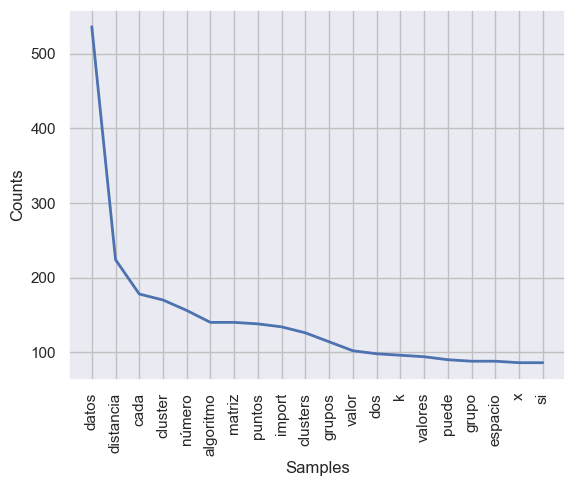

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [11]:
import nltk

freq = nltk.FreqDist(clean_tokens)

sns.set()
freq.plot(20, cumulative=False)

## lematization


In [15]:
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


You should consider upgrading via the 'C:\Users\rbblazquez\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\rbblazquez\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
import spacy

nlp_es = spacy.load('es_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

clean_tokens_lem_es = []

for token in nlp_es(' '.join(clean_tokens)):
    print(token.text, token.lemma_, token.pos_)
    clean_tokens_lem_es.append(token.lemma_)

aprendizaje aprendizaje NOUN
supervisado supervisado ADJ
aprendizaje aprendizaje NOUN
supervisado supervisado ADJ
reducción reducción NOUN
dimensionalidad dimensionalidad NOUN
análisis análisis NOUN
componentes componente NOUN
principales principal ADJ
pca pca NOUN
algoritmo algoritmo ADJ
tsne tsne NOUN
clustering clustering VERB
concepto concepto NOUN
distancia distancio ADJ
concepto concepto NOUN
similitud similitud NOUN
algoritmo algoritmo ADJ
affinitaffinity affinitaffinity NOUN
propagation propagation PROPN
algoritmo algoritmo NOUN
dbscan dbscir VERB
algoritmo algoritmo NOUN
algoritmo algoritmo NOUN
fuzzy fuzzy NOUN
algoritmos algoritmo ADJ
jerárquicos jerárquico ADJ
hierarchical hierarchical DET
clustering clustering NOUN
algorithm algorithm VERB
hca hca PROPN
birch birch PROPN
hdbscan hdbscar VERB
aprendizaje aprendizaje NOUN
supervisado supervisado ADJ
aprendizaje aprendizaje NOUN
supervisado supervisado ADJ
dispone disponer VERB
etiquetas etiqueta NOUN
yi yi PRON
individuo ind

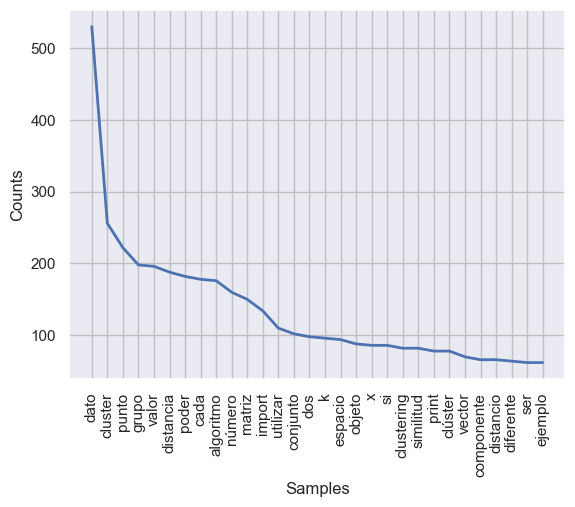

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [18]:
freq = nltk.FreqDist(clean_tokens_lem_es)

sns.set()

freq.plot(30, cumulative=False)